**You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:**
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

**Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:**

**Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# read the data file
data=pd.read_csv("D:/Downloads/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.**

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see there few data for columns Glucose,Insulin,skin thickness,BMI and Blood Pressure which have value as 0.That's not possible right? we can do quick search to see that one cannot have o values for these.Let's deal with that. We can either remove such data or simply replace it with their respective mean values.

In [6]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())



In [88]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [85]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: >

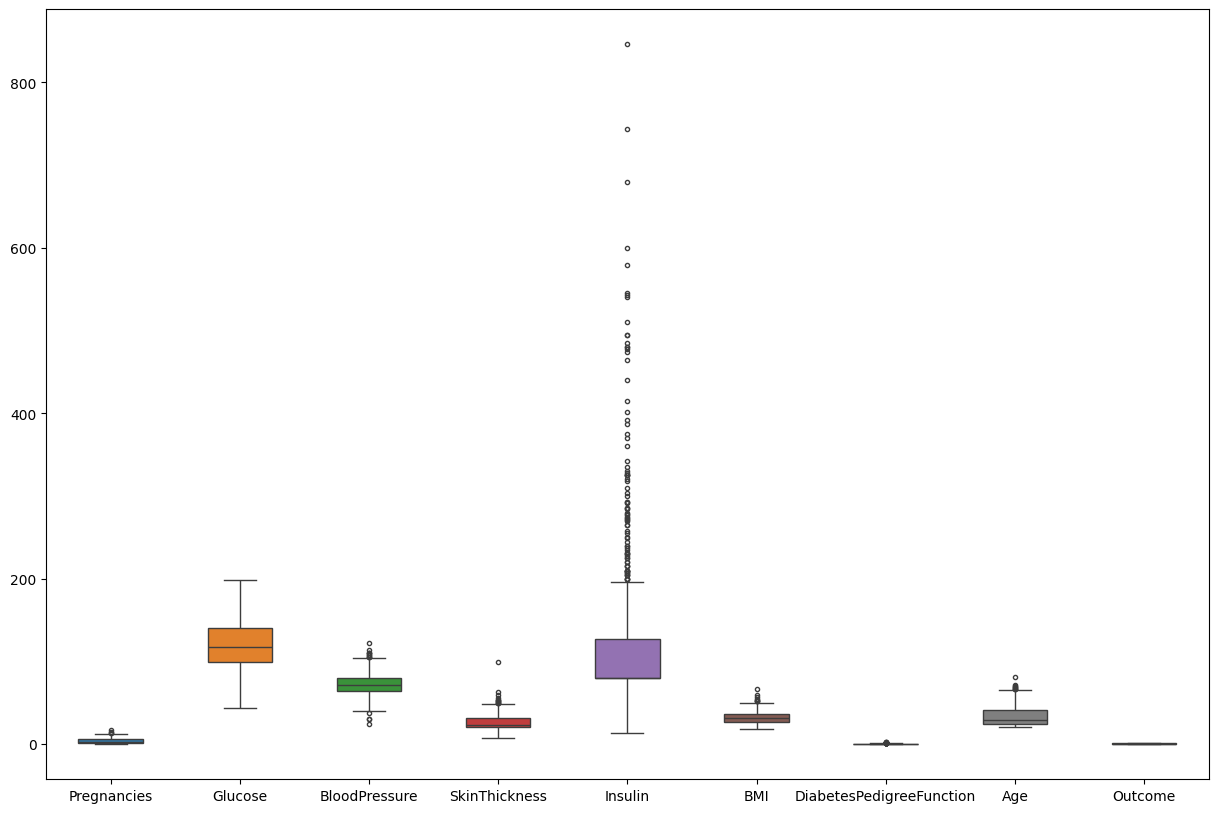

In [8]:
import seaborn as sns

#now we have dealt with the 0 values and data looks better. But, there still are outliers present i the data
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5,ax=ax,fliersize=3)

In [87]:
data['Insulin'].describe()

count    768.000000
mean     118.660163
std       93.080358
min       14.000000
25%       79.799479
50%       79.799479
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [97]:
## Calculate Outliers Using IQR

Q1 = data['Insulin'].quantile(0.25)
Q3 = data['Insulin'].quantile(0.75)
IQR = Q3-Q1

#Define bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

data=data[(data['Insulin']>=lower_bound) & (data['Insulin']<=upper_bound)]

Since Insulin has a wide range of values, normalization may help balance its influence on the model

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler=MinMaxScaler()
data['Insulin']=scaler.fit_transform(data[['Insulin']])

In [104]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,0.361536,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,0.361536,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,0.361536,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,0.439560,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,0.846154,43.1,2.288,33,1


<Axes: >

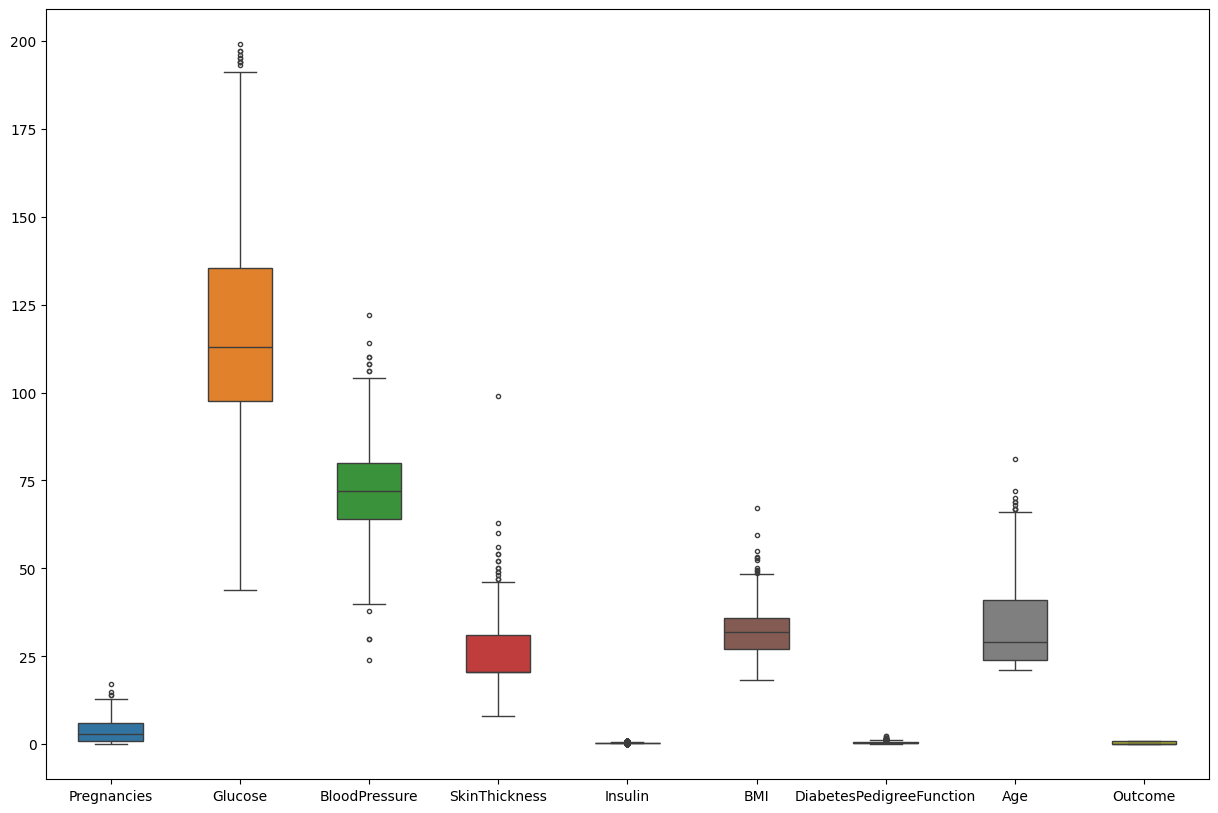

In [106]:
import seaborn as sns

#now we have dealt with the 0 values and data looks better. But, there still are outliers present i the data
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5,ax=ax,fliersize=3)

<Axes: ylabel='Density'>

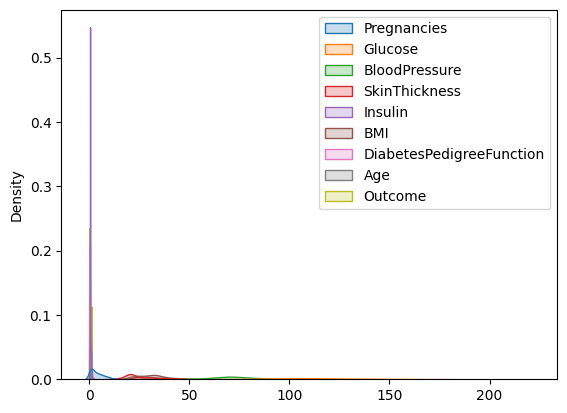

In [150]:
sns.kdeplot(data, shade=True, color='red')

In [160]:
correlation = data.corr()

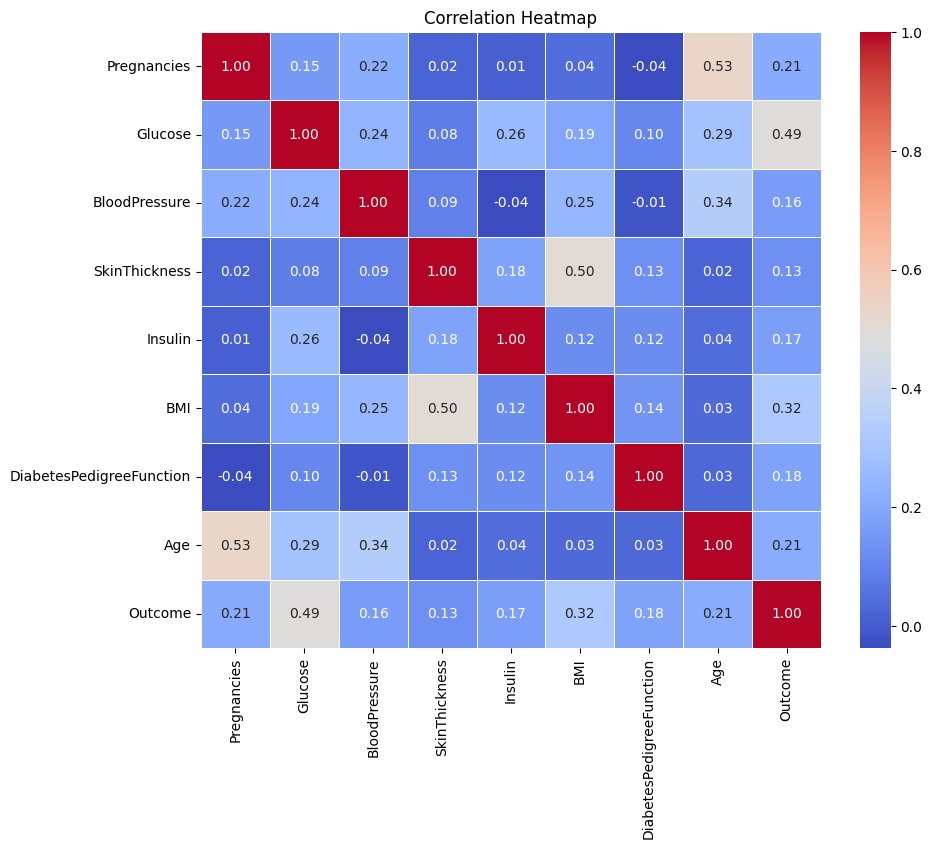

In [108]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.**


In [142]:
data['Outcome'].value_counts()

Outcome
0    458
1    221
Name: count, dtype: int64

In [151]:
##Since our data is imbalanced we will first balance our data
from imblearn.over_sampling import SMOTE

In [152]:
## transform the dataset
oversample = SMOTE()

In [153]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [154]:
X,y = oversample.fit_resample(X,y)

In [155]:
X.shape

(916, 8)

In [156]:
len(y[y==0])

458

In [157]:
len(y[y==1])

458

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.**

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
treeclassifier=DecisionTreeClassifier()

In [165]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [166]:
y_pred=treeclassifier.predict(X_test)

In [167]:
from sklearn.metrics import accuracy_score,classification_report

In [217]:
accuracy_score(y_pred,y_test)

0.7336956521739131

In [218]:
import warnings 
warnings.filterwarnings('ignore')

In [219]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2'],
}

In [220]:
from sklearn.model_selection import GridSearchCV

In [221]:
clf=GridSearchCV(treeclassifier,param_grid=parameter,cv=5,scoring='accuracy')

In [222]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [223]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [224]:
y_pred2=clf.predict(X_test)

In [232]:
accuracy_score(y_pred2,y_test)

0.5163043478260869

In [214]:
treeclassifier2=DecisionTreeClassifier(criterion='gini',max_depth=4,max_features='log2',splitter='best')

In [215]:
treeclassifier2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='log2')

[Text(0.49107142857142855, 0.9, 'x[5] <= 27.809\ngini = 0.5\nsamples = 732\nvalue = [363.0, 369.0]'),
 Text(0.26785714285714285, 0.7, 'x[1] <= 151.5\ngini = 0.289\nsamples = 177\nvalue = [146, 31]'),
 Text(0.3794642857142857, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'x[7] <= 27.5\ngini = 0.155\nsamples = 154\nvalue = [141, 13]'),
 Text(0.07142857142857142, 0.3, 'x[2] <= 63.0\ngini = 0.087\nsamples = 88\nvalue = [84, 4]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.169\nsamples = 43\nvalue = [39, 4]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 45\nvalue = [45, 0]'),
 Text(0.21428571428571427, 0.3, 'x[1] <= 123.0\ngini = 0.236\nsamples = 66\nvalue = [57, 9]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.12\nsamples = 47\nvalue = [44.0, 3.0]'),
 Text(0.25, 0.1, 'gini = 0.432\nsamples = 19\nvalue = [13, 6]'),
 Text(0.39285714285714285, 0.5, 'x[4] <= 0.406\ngini = 0.34\nsamples = 23\nvalue = [5, 18]'),
 Text(0.35714285714285715, 0.3, 'x[6] <= 0.611\ngini = 0.473\nsamples = 

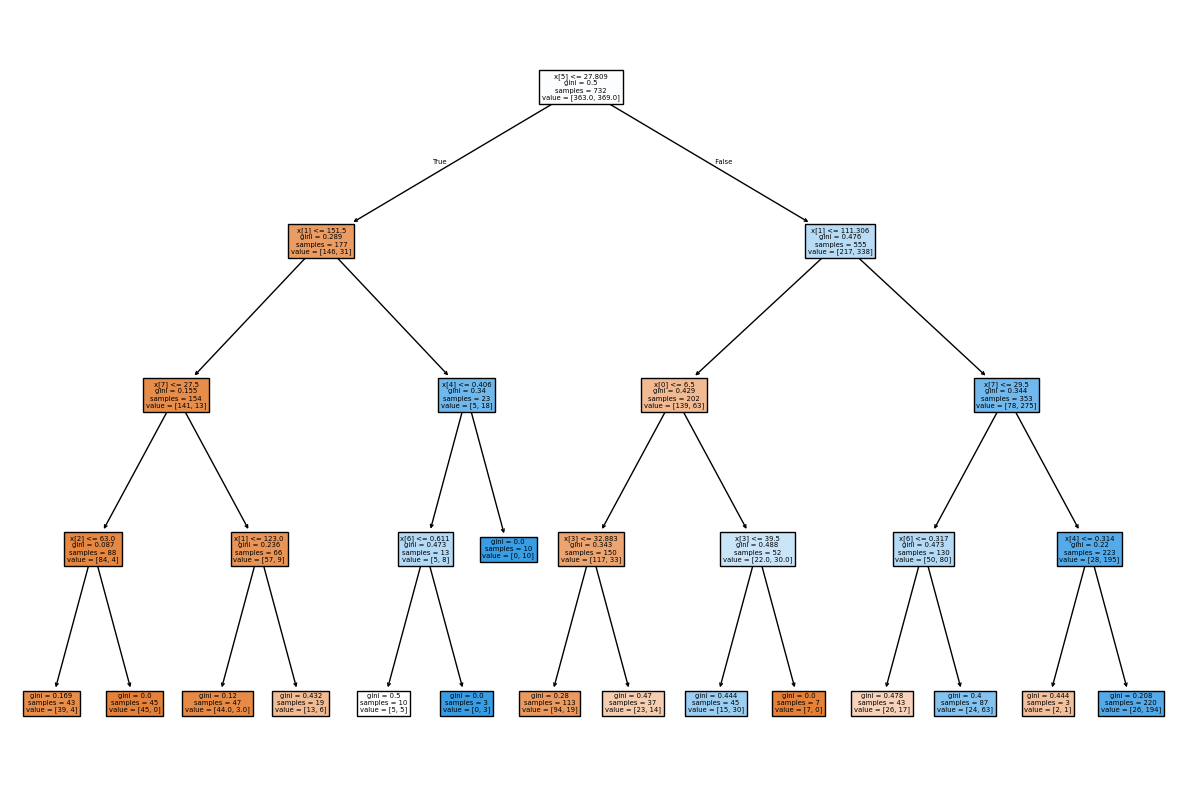

In [216]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier2,filled=True)

**Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.**

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report


In [183]:
print(accuracy_score(y_pred2,y_test))

0.657608695652174


In [184]:
print(recall_score(y_pred2,y_test))

0.6031746031746031


In [185]:
print(precision_score(y_pred2,y_test))

0.8539325842696629


In [186]:
print(f1_score(y_pred2,y_test))

0.7069767441860465


**Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.**

The tree likely prioritizes features like Glucose, BMI, and Age as key predictors for diabetes. This is based on the known association of these factors with diabetes risk.

- Splits: The tree likely creates splits based on thresholds for these variables. For example, a split might be "Glucose > 140" or "BMI > 30."

- Branches: Each split creates branches, leading to further divisions based on other features.

- Leaf Nodes: The final leaf nodes represent predictions (diabetic or non-diabetic) for specific combinations of feature values.

Domain Knowledge and Common Sense:

- High Glucose: Elevated blood sugar is a hallmark of diabetes, so splits based on Glucose levels are expected.
- BMI: Obesity is a major risk factor for type 2 diabetes, making BMI a relevant predictor.
- Age: The risk of diabetes increases with age.